In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Set time to a certain number of years

In [3]:
years = 15

end = dt.datetime.now()
start = end - dt.timedelta(days = 365*years)

In [4]:
# Create a list of tickers

In [5]:
tickers = ["BHARTIARTL.NS","HDFCBANK.NS","ICICIBANK.BO","RELIANCE.NS","TCS.NS"]

In [6]:
# Download the daily close prices for the tickers

In [7]:
df = yf.download(tickers, start, end)
Close = df.Close
Close.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_66900\4162263802.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start, end)
[*********************100%***********************]  5 of 5 completed


Ticker,BHARTIARTL.NS,HDFCBANK.NS,ICICIBANK.BO,RELIANCE.NS,TCS.NS
Date,,,,,
2010-09-02,278.347626,91.322922,114.388634,191.944183,335.106537
2010-09-03,282.638275,91.594284,114.023621,189.538376,332.406860
2010-09-06,286.095703,92.026382,118.363731,195.056412,339.572632
2010-09-07,286.220642,91.809303,118.181252,197.032242,345.924652
2010-09-08,293.260529,90.995193,116.949371,196.479462,348.981628


In [8]:
# Calculate the daily log returns and drop any NAs

In [9]:
log_returns = np.log(Close/Close.shift(1)).dropna()
log_returns

Ticker,BHARTIARTL.NS,HDFCBANK.NS,ICICIBANK.BO,RELIANCE.NS,TCS.NS
Date,,,,,
2010-09-03,0.015297,0.002967,-0.003196,-0.012613,-0.008089
2010-09-06,0.012158,0.004706,0.037357,0.028697,0.021328
2010-09-07,0.000437,-0.002362,-0.001543,0.010079,0.018533
2010-09-08,0.024298,-0.008907,-0.010478,-0.002809,0.008798
2010-09-09,-0.005412,0.029497,0.024519,-0.001095,-0.004961
...,...,...,...,...,...
2025-08-20,0.009745,-0.001458,-0.004291,-0.005012,0.026953
2025-08-21,0.000778,0.001508,0.010814,0.008316,0.001290
2025-08-22,0.001760,-0.013449,-0.006662,-0.011009,-0.015788


In [10]:
# Create a function that will be used to calculate portfolio expected return

In [11]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

In [12]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [13]:
# Create a covariance matrix for all the securities

In [14]:
cov_matrix = log_returns.cov()
print(cov_matrix)

Ticker         BHARTIARTL.NS  HDFCBANK.NS  ICICIBANK.BO  RELIANCE.NS    TCS.NS
Ticker                                                                        
BHARTIARTL.NS       0.000360     0.000080      0.000117     0.000096  0.000049
HDFCBANK.NS         0.000080     0.000212      0.000158     0.000105  0.000055
ICICIBANK.BO        0.000117     0.000158      0.000393     0.000140  0.000065
RELIANCE.NS         0.000096     0.000105      0.000140     0.000295  0.000072
TCS.NS              0.000049     0.000055      0.000065     0.000072  0.000239


In [15]:
# Create an equally weighted portfolio and find total portfolio expected return and standard deviation

In [16]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation(weights, cov_matrix)

In [17]:
# Create a function that gives a random Z-score based on normal distribution

In [18]:
def random_z_score():
    return np.random.normal(0,1)

In [19]:
# Create a function to calculate Scenario GainLoss.

In [20]:
days = 1

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

In [21]:
# Run 10,000 simulation

In [22]:
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

In [23]:
# Specify a confidence interval and calculate the Value at Risk

In [24]:
confidence_interval = 0.99
VaR = -np.percentile(scenarioReturn, 100*(1 - confidence_interval))
print(VaR)

26653.508154724383


In [25]:
# Plot the results of all 10,000 scenarios

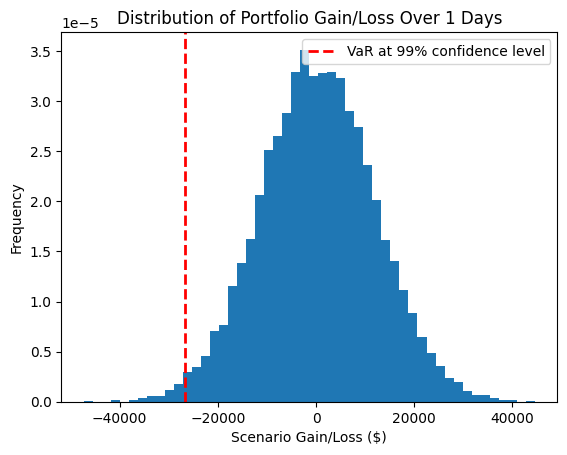

In [26]:
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel("Scenario Gain/Loss ($)")
plt.ylabel("Frequency")
plt.title(f"Distribution of Portfolio Gain/Loss Over {days} Days")
plt.axvline(-VaR, color="r", linestyle = "dashed", linewidth = 2, label=f"VaR at {confidence_interval:.0%} confidence level")
plt.legend()
plt.show()